# Distributed/Fault Tolerant Agents with Burr

This is supporting code for two blog posts:
1. [Parallel Multi Agent Workflows with Burr](https://blog.dagworks.io/p/93838d1f-52b5-4a72-999f-9cab9733d4fe)
2. [Parallel, Fault-Tolerant Agents with Burr/Ray](https://blog.dagworks.io/p/5baf1077-2490-44bc-afff-fcdafe18e819)

This runs the application using a local ray instance.

In [31]:
import ray
import pprint

import application as parallel_application
from burr.core import State

In [19]:
# execute to load the Burr and Hamilton extensions
%pip install burr openai ray
%load_ext burr.integrations.notebook


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
The burr.integrations.notebook extension is already loaded. To reload it, use:
  %reload_ext burr.integrations.notebook


In [1]:
app = parallel_application.application()

# Application Graph

This is the flowchart of the application. Note that `generate_all_poems` is actually a recursive set of sub-applications.

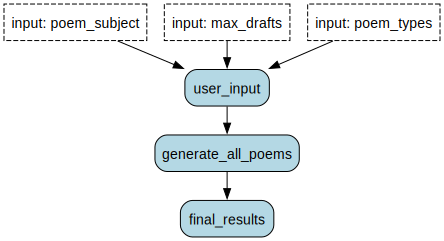

In [15]:
app.graph

# Sub-application Graph

This represents the sub-application inside `generate_all_poems` -- we generate one of these for each poem type specified by the user (E.G. limerick, haiku, sonnet, etc...).

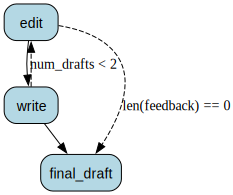

In [24]:
# Do not access the sub-application this way -- just for the demo!
app.graph.get_action("generate_all_poems").action(state=State({"max_drafts" : 2}), inputs={}).graph

In [20]:
# execute cell to launch the UI
%burr_ui

In [36]:
ray.init(ignore_reinit_error=True)
act, _, state = app.run(
    halt_after=["final_results"],
    inputs={
        "max_drafts": 2,
        "poem_types": [
            "sonnet",
            "limerick",
            "haiku",
            "acrostic",
        ],
        "poem_subject": "state machines",
    },
)
pprint.pprint(state.get_all())

2024-12-22 20:40:19,330	INFO worker.py:1654 -- Calling ray.init() again after it has already been called.
This is trying to return without having computed a single action -- we'll end up just returning some Nones. This means that nothing was executed (E.G. that the state machine had nowhere to go). Either fix the state machine orthe halt conditions, or both... Halt conditions are: halt_before=[], halt_after=['final_results'].Note that this is considered undefined behavior -- if you get here, you should fix!


{'__PRIOR_STEP': 'final_results',
 '__SEQUENCE_ID': 3,
 'final_results': 'sonnet:\n'
                  "['In myriad states, a cyclic dance unfolds,  \\nUpon the "
                  'stage of logic, firm and clear.  \\nAn automaton with '
                  'structured bounds it holds,  \\nDesigned by minds, both '
                  'intricate and near.  \\n\\nWith each transition, patterns '
                  'trace the flow,  \\nA pulse of truth propels the forward '
                  'sweep.  \\nConditions mark the paths, both high and low,  '
                  '\\nAs inputs carve formations, wide and deep.  '
                  '\\n\\nDeterministic threads, like textiles spun,  \\nWeave '
                  'tapestries of boundless, coded choice.  \\nA binary ballet '
                  'that shies from none,  \\nYet whispers softly with a silent '
                  'voice.  \\n\\nIn finite bounds, infinite patterns weave,  '
                  '\\nOrder from chaos, logic born to leave. 